In [33]:
# importing the required libraries
import torch
import sklearn
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [34]:
# importing the make_classification function
from sklearn.datasets import make_classification
# manual seed() to initialize the random number generator
torch.manual_seed(123)

In [35]:
## Make a Toy Dataset
# creating a classification data set using the make_classification function
X,y=make_classification(n_samples=1000,n_features=4 ,n_classes=2)

### Change it into the Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [36]:
X

tensor([[-0.0705,  0.8040,  1.3511, -1.3232],
        [ 0.1846,  1.1284,  1.4100,  0.3577],
        [-0.0091, -1.2548, -1.9042,  1.1339],
        ...,
        [-0.2551, -1.2863, -1.5307, -0.7568],
        [ 0.3036,  1.3038,  1.4744,  1.1184],
        [ 0.2058,  1.2752,  1.5984,  0.3820]])

In [37]:
y

tensor([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
        1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 1., 1., 

In [38]:
### Data Suffling
torch.manual_seed(10)
# randperm returns the vector of random permutation of the long integers
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:10]

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])

In [39]:
# Train Test split
train_size=int(suffle_idx.size(0)*0.7)
train_idx= suffle_idx[:train_size]
test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [40]:
X_train.shape

torch.Size([700, 4])

In [41]:
X_test.shape

torch.Size([300, 4])

In [42]:
y_train.shape

torch.Size([700])

In [43]:
y_test.shape

torch.Size([300])

In [44]:
#### Normalizing the dataset

mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [45]:
import torch.nn as nn
from torch.autograd import grad

In [68]:
# definning the class NN
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)


In [73]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  # cost list for storing the cost of the error function 
  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:

      ###1. Compute the output
      yhat=model.forward(x[idx])

      ###2. Compute the Error
      loss=loss_fn(yhat,y[idx])

      ###3. Compute the gradient
      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      ###4. Update Model Parameters
      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b

    ###5. Log and print the loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [74]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=70)

Epoc:   1 | MSE  0.46444
Epoc:   2 | MSE  0.43835
Epoc:   3 | MSE  0.41433
Epoc:   4 | MSE  0.39220
Epoc:   5 | MSE  0.37177
Epoc:   6 | MSE  0.35289
Epoc:   7 | MSE  0.33542
Epoc:   8 | MSE  0.31924
Epoc:   9 | MSE  0.30425
Epoc:  10 | MSE  0.29033
Epoc:  11 | MSE  0.27739
Epoc:  12 | MSE  0.26535
Epoc:  13 | MSE  0.25415
Epoc:  14 | MSE  0.24371
Epoc:  15 | MSE  0.23397
Epoc:  16 | MSE  0.22489
Epoc:  17 | MSE  0.21641
Epoc:  18 | MSE  0.20849
Epoc:  19 | MSE  0.20107
Epoc:  20 | MSE  0.19413
Epoc:  21 | MSE  0.18765
Epoc:  22 | MSE  0.18158
Epoc:  23 | MSE  0.17589
Epoc:  24 | MSE  0.17056
Epoc:  25 | MSE  0.16556
Epoc:  26 | MSE  0.16087
Epoc:  27 | MSE  0.15648
Epoc:  28 | MSE  0.15235
Epoc:  29 | MSE  0.14848
Epoc:  30 | MSE  0.14484
Epoc:  31 | MSE  0.14143
Epoc:  32 | MSE  0.13822
Epoc:  33 | MSE  0.13520
Epoc:  34 | MSE  0.13237
Epoc:  35 | MSE  0.12970
Epoc:  36 | MSE  0.12720
Epoc:  37 | MSE  0.12484
Epoc:  38 | MSE  0.12263
Epoc:  39 | MSE  0.12054
Epoc:  40 | MSE  0.11858


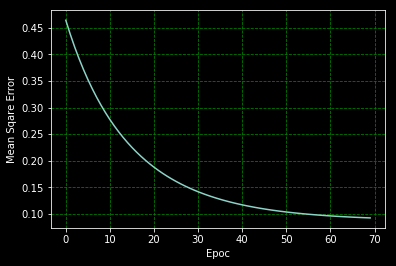

In [75]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.grid(linestyle='--',color='green')
plt.show()

In [76]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))


Training Accuracy: 92.86
Testing Accuracy: 93.33


### Model Using Pytorch

In [22]:
import torch
import sklearn
import torch.nn.functional as F

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
### Create The dataset
X,y=make_classification(n_samples=1000,n_classes=2,n_features=4)

### Normalize the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Array to Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [25]:
X

tensor([[ 9.1955e-01,  1.2503e+00,  8.3105e-01,  2.4658e-01],
        [ 1.8242e+00,  2.1322e+00,  1.2641e+00,  1.7189e-01],
        [-1.1897e+00,  9.7982e-01,  1.7927e+00,  2.0475e+00],
        ...,
        [ 7.8223e-01,  8.3474e-01,  4.5425e-01,  1.2418e-03],
        [ 1.1197e+00,  1.4436e+00,  9.2483e-01,  2.2837e-01],
        [-1.8001e-02, -7.3264e-01, -7.9816e-01, -6.5001e-01]])

In [26]:
y

tensor([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [28]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()

  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)

In [29]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.mse_loss(yhat,y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [30]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)

In [31]:
cost=train(model,X_train,y_train,n_epoch=200)

Epoc:   1 | MSE  0.46167
Epoc:   2 | MSE  0.42979
Epoc:   3 | MSE  0.40113
Epoc:   4 | MSE  0.37528
Epoc:   5 | MSE  0.35193
Epoc:   6 | MSE  0.33083
Epoc:   7 | MSE  0.31171
Epoc:   8 | MSE  0.29433
Epoc:   9 | MSE  0.27854
Epoc:  10 | MSE  0.26416
Epoc:  11 | MSE  0.25105
Epoc:  12 | MSE  0.23906
Epoc:  13 | MSE  0.22809
Epoc:  14 | MSE  0.21801
Epoc:  15 | MSE  0.20877
Epoc:  16 | MSE  0.20027
Epoc:  17 | MSE  0.19244
Epoc:  18 | MSE  0.18522
Epoc:  19 | MSE  0.17854
Epoc:  20 | MSE  0.17237
Epoc:  21 | MSE  0.16664
Epoc:  22 | MSE  0.16133
Epoc:  23 | MSE  0.15639
Epoc:  24 | MSE  0.15181
Epoc:  25 | MSE  0.14754
Epoc:  26 | MSE  0.14356
Epoc:  27 | MSE  0.13985
Epoc:  28 | MSE  0.13639
Epoc:  29 | MSE  0.13315
Epoc:  30 | MSE  0.13012
Epoc:  31 | MSE  0.12729
Epoc:  32 | MSE  0.12463
Epoc:  33 | MSE  0.12214
Epoc:  34 | MSE  0.11981
Epoc:  35 | MSE  0.11762
Epoc:  36 | MSE  0.11557
Epoc:  37 | MSE  0.11363
Epoc:  38 | MSE  0.11182
Epoc:  39 | MSE  0.11012
Epoc:  40 | MSE  0.10851


[]

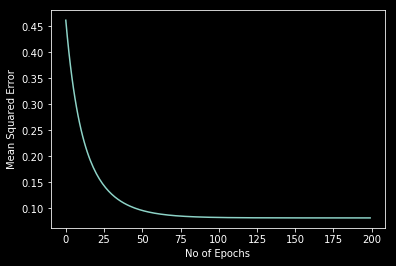

In [32]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [30]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.96
Testing Accuracy: 0.96


### Logistic Regression

In [31]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.binary_cross_entropy(torch.sigmoid(yhat),y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [32]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [33]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.49526
Epoc:   2 | MSE  0.48517
Epoc:   3 | MSE  0.47544
Epoc:   4 | MSE  0.46604
Epoc:   5 | MSE  0.45699
Epoc:   6 | MSE  0.44827
Epoc:   7 | MSE  0.43989
Epoc:   8 | MSE  0.43182
Epoc:   9 | MSE  0.42407
Epoc:  10 | MSE  0.41663
Epoc:  11 | MSE  0.40949
Epoc:  12 | MSE  0.40265
Epoc:  13 | MSE  0.39611
Epoc:  14 | MSE  0.38985
Epoc:  15 | MSE  0.38388
Epoc:  16 | MSE  0.37818
Epoc:  17 | MSE  0.37276
Epoc:  18 | MSE  0.36760
Epoc:  19 | MSE  0.36271
Epoc:  20 | MSE  0.35807
Epoc:  21 | MSE  0.35368
Epoc:  22 | MSE  0.34955
Epoc:  23 | MSE  0.34565
Epoc:  24 | MSE  0.34200
Epoc:  25 | MSE  0.33857
Epoc:  26 | MSE  0.33538
Epoc:  27 | MSE  0.33241
Epoc:  28 | MSE  0.32967
Epoc:  29 | MSE  0.32714
Epoc:  30 | MSE  0.32482
Epoc:  31 | MSE  0.32271
Epoc:  32 | MSE  0.32081
Epoc:  33 | MSE  0.31910
Epoc:  34 | MSE  0.31759
Epoc:  35 | MSE  0.31628
Epoc:  36 | MSE  0.31516
Epoc:  37 | MSE  0.31422
Epoc:  38 | MSE  0.31346
Epoc:  39 | MSE  0.31289
Epoc:  40 | MSE  0.31249


[]

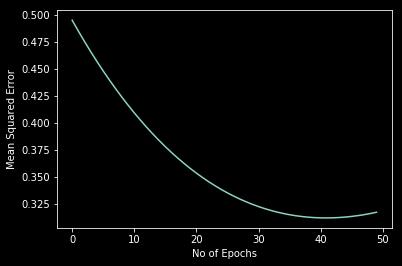

In [34]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [35]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.72
Testing Accuracy: 0.73
